In [1]:
import glob
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [3]:
from utils import camera_calibration, combined_thresh, perspective_trans, fit_poly, fit_poly2, impose_lane
from find_lines import LineFinding
from detection import VehicleDetection
from road_process import Road_Process

In [6]:
mtx, dist = camera_calibration('./camera_cal/*.jpg', 9, 6)
images = glob.glob('./camera_cal/*.jpg')
for i in images:
    test_image = mpimg.imread(i)
    test_image_undistort = cv2.undistort(test_image, mtx, dist, None, mtx)
    plt.imsave('./output_images/camera_cal_undistort/Cal_'+i.split("/")[-1], test_image_undistort)

In [8]:
images = glob.glob("./test_images/test*.jpg")
for i in images:
    test_image = mpimg.imread(i)
    test_image_thre = combined_thresh(test_image)
    plt.imsave("./output_images/gradient_pic/thre_"+i.split("/")[-1], test_image_thre, cmap="gray")

In [9]:
src = np.float32([[577,463],[707,463],[244,688],[1059,688]])
dst = np.float32([[244,200],[950,200], [244,700],[950,700]])
M, Minv = perspective_trans(src, dst)

images = glob.glob("./test_images/test*.jpg")
for i in images:
    img = mpimg.imread(i)
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    warped = cv2.warpPerspective(undist, M, (undist.shape[1], undist.shape[0]))
    plt.imsave("./output_images/perspective_trans/pers_"+i.split("/")[-1], warped)

In [10]:
images = glob.glob("./test_images/test*.jpg")
for i in images:
    img = mpimg.imread(i)
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    undist_thre = combined_thresh(undist)
    warped = cv2.warpPerspective(undist_thre, M, (undist_thre.shape[1], undist_thre.shape[0]))
    left_fit, right_fit = fit_poly(warped, show=True)
    plt.savefig("./output_images/finding_lanes/lane_"+i.split("/")[-1])
    plt.close()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [11]:
images = glob.glob("./test_images/test*.jpg")
for i in images:
    img = mpimg.imread(i)
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    undist_thre = combined_thresh(undist)
    warped = cv2.warpPerspective(undist_thre, M, (undist_thre.shape[1], undist_thre.shape[0]))
    left_fit, right_fit = fit_poly(warped)
    rst = impose_lane(warped, undist, left_fit, right_fit, Minv)
    plt.imsave("./output_images/imposing_lanes/final_"+i.split("/")[-1], rst)

In [12]:
cali_img_dir='./camera_cal/*.jpg'
nx=9
ny=6
src = np.float32([[577,463],[707,463],[244,688],[1059,688]])
dst = np.float32([[244,200],[950,200], [244,700],[950,700]])

q = LineFinding()
q.preprocess(cali_img_dir, nx, ny, src, dst)

In [13]:
images = glob.glob("./test_images/test*.jpg")
for i in images:
    img = mpimg.imread(i)
    rst = q.pipeline(img)
    plt.imsave("./output_images/pipe_line/pipe_"+i.split("/")[-1], rst)

In [14]:
img = mpimg.imread("./test_images/test3.jpg")
undist = cv2.undistort(img, mtx, dist, None, mtx)
undist_thre = combined_thresh(undist)
warped = cv2.warpPerspective(undist_thre, M, (undist_thre.shape[1], undist_thre.shape[0]))
left_fit, right_fit = fit_poly(warped)
rst = impose_lane(warped, undist, left_fit, right_fit, Minv)

<Figure size 720x1440 with 0 Axes>

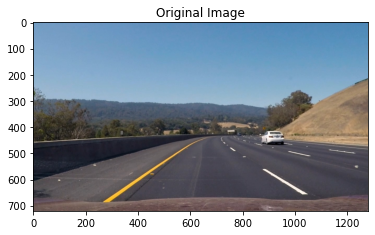

<Figure size 720x1440 with 0 Axes>

In [15]:
plt.imshow(img)
plt.title("Original Image")
plt.figure(figsize=(10,20))

Text(0.5, 1.0, 'Undistort Image')

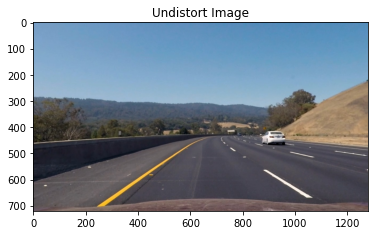

In [16]:
plt.imshow(undist)
plt.title("Undistort Image")

Text(0.5, 1.0, 'Gradient Map Image')

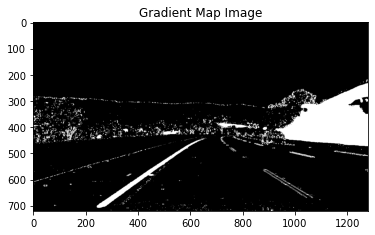

In [17]:
plt.imshow(undist_thre, cmap='gray')
plt.title("Gradient Map Image")

Text(0.5, 1.0, 'Perspective Transform Image')

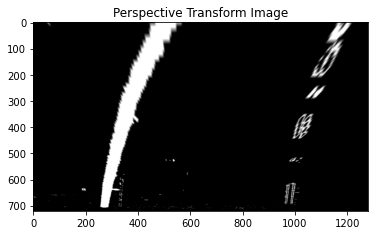

In [18]:
plt.imshow(warped, cmap='gray')
plt.title("Perspective Transform Image")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Line Fit Image')

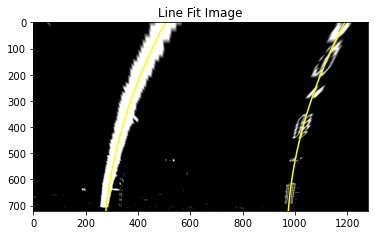

In [19]:
left_fit, right_fit = fit_poly(warped, show=True)
plt.title("Line Fit Image")

Text(0.5, 1.0, 'Line Fit Image')

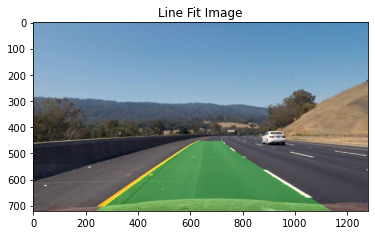

In [20]:
plt.imshow(rst)
plt.title("Line Fit Image")

In [21]:
from moviepy.editor import VideoFileClip

output = 'project_output.mp4'
clip1 = VideoFileClip("./project_video.mp4")
clip = clip1.fl_image(lambda img: q.pipeline(img, frame=True))
clip.write_videofile(output, audio=False)

t:   0%|          | 2/1260 [00:00<01:04, 19.52it/s, now=None]

Moviepy - Building video project_output.mp4.
Moviepy - Writing video project_output.mp4



Moviepy - Done !
Moviepy - video ready project_output.mp4
